
# DMC - Python for Analytics - Sesión 06
Profesor: Manuel Montoya | Data Scientist @ Belcorp

In [134]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import pandas
import numpy
import os

from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.decomposition import PCA

import seaborn
import matplotlib.pyplot as plt

In [136]:
path_base = '/content/drive/My Drive/python-for-analytics/sesion-06/data'
os.listdir(path_base)

['charlie.jpg', 'mandala.jpg', 'mall-customers.csv', 'mall-customers.gsheet']

# Kmeans

Mall Customer Data https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [137]:
df_customers = pandas.read_csv(f"{path_base}/mall-customers.csv")
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [138]:
df_customers = df_customers.drop("CustomerID", axis = 1)
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [139]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [140]:
df_customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [141]:
df_customers["Gender"] = df_customers["Gender"].apply(lambda value: 1 if value == "Female" else 0)

In [142]:
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [161]:
model = KMeans(n_clusters = 3)
model.fit(df_customers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [162]:
model.predict(df_customers)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [163]:
df_customers["cluster1"] = model.predict(df_customers)
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster1
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


Text(0.5, 0, 'Age')

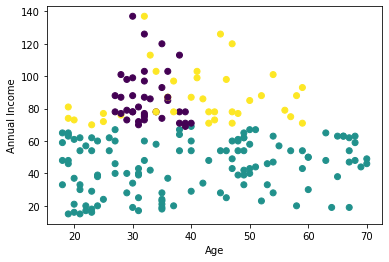

In [164]:
plt.scatter(df_customers["Age"], df_customers["Annual Income (k$)"], c = df_customers["cluster1"])
plt.ylabel("Annual Income")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

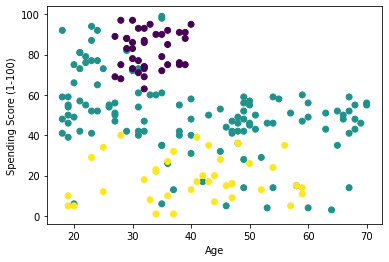

In [165]:
plt.scatter(df_customers["Age"], df_customers["Spending Score (1-100)"], c = df_customers["cluster1"])
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")

Text(0.5, 0, 'Annual Income (k$)')

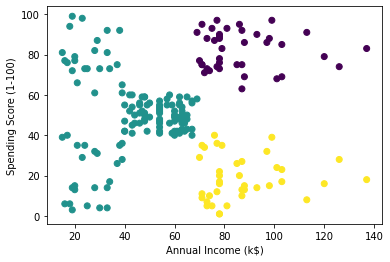

In [166]:
plt.scatter(df_customers["Annual Income (k$)"], df_customers["Spending Score (1-100)"], c = df_customers["cluster1"])
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")

# Preprocesamiento de variables

In [167]:
df_customers = df_customers.drop("cluster1", axis = 1)
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [168]:
df_scaled = pandas.DataFrame(preprocessing.scale(df_customers),columns = df_customers.columns) 
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [170]:
df_customers.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [169]:
df_scaled.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-8.437695e-17,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.128152e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-1.128152e+00,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,8.864053e-01,7.284319e-01,6.656748e-01,8.851316e-01
max,8.864053e-01,2.235532e+00,2.917671e+00,1.894492e+00


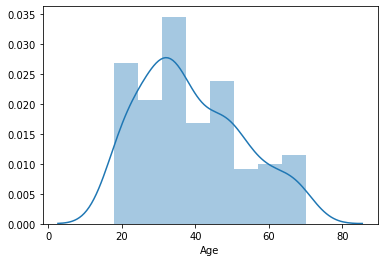

In [171]:
seaborn.distplot(df_customers["Age"])

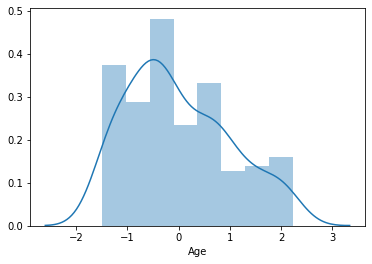

In [172]:
seaborn.distplot(df_scaled["Age"])

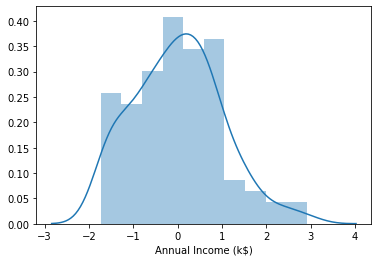

In [173]:
seaborn.distplot(df_scaled["Annual Income (k$)"])

# Análisis de componentes principales (PCA)

In [174]:
pca = PCA(n_components = 2)

In [177]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [176]:
pca.fit(df_scaled)
pca.transform(df_scaled)[:5]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272]])

In [178]:
pca.components_

array([[-0.23430156,  0.68790025, -0.00608217, -0.68691996],
       [-0.62688553, -0.10368955,  0.7652519 ,  0.10321115]])

In [180]:
index = [f'PC-{i}' for i in range(2)]
df_factors = pandas.DataFrame(pca.components_,columns=df_scaled.columns,index = index).T
df_factors

,PC-0,PC-1
Gender,-0.234302,-0.626886
Age,0.687900,-0.103690
Annual Income (k$),-0.006082,0.765252
Spending Score (1-100),-0.686920,0.103211


In [179]:
pca_factors = pca.transform(df_scaled)
pca_factors[:5]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272]])

In [181]:
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [182]:
numpy.sum(pca.explained_variance_ratio_)

0.5992069019819846

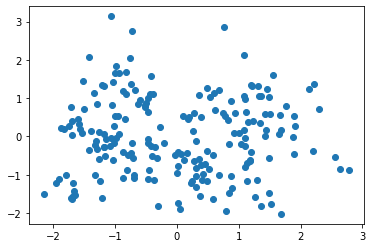

In [183]:
plt.scatter(pca_factors[:,0], pca_factors[:,1])

# KMeans

Documentación https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [190]:
model = KMeans(n_clusters = 3)
model.fit(pca_factors)
clusters = model.predict(pca_factors)

Text(0.5, 0, 'Factor 1')

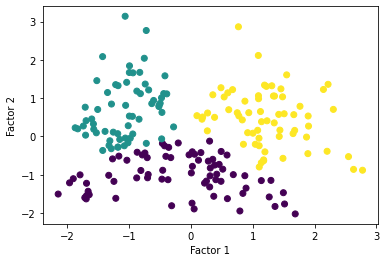

In [191]:
plt.scatter(pca_factors[:,0], pca_factors[:,1], c = clusters)
plt.ylabel("Factor 2")
plt.xlabel("Factor 1")

In [192]:
df_customers["clusters_pca"] = clusters

In [193]:
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters_pca
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


In [194]:
df_customers.groupby("clusters_pca").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters_pca,,,,
0,0.958904,37.863014,42.917808,48.616438
1,0.403226,29.000000,71.919355,74.500000
2,0.261538,49.353846,69.538462,28.800000


In [195]:
df_customers.groupby("clusters_pca").count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters_pca,,,,
0,73,73,73,73
1,62,62,62,62
2,65,65,65,65


# Método del codo

In [196]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


Total variance 1: 0.3369004557101255
Total variance 2: 0.5992069019819846
Total variance 3: 0.831813287884595
Total variance 4: 0.9999999999999999


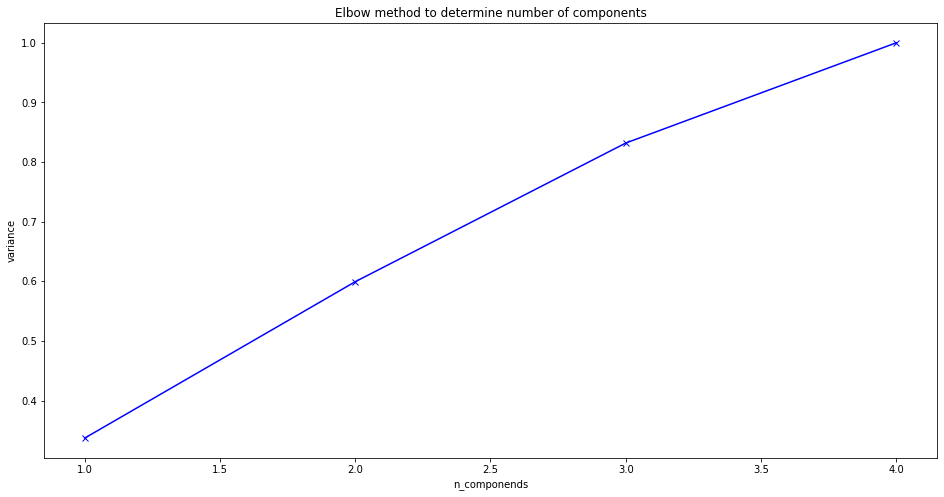

In [198]:
components = list(range(1,5))
total_variance = []

for n_components in components:
    
    pca = PCA(n_components = n_components)
    pca.fit(df_scaled)
    
    variance_components = numpy.sum(pca.explained_variance_ratio_)
    total_variance.append(variance_components)
    
    print(f"Total variance {n_components}: {variance_components}")
    
    
plt.figure(figsize=(16,8))
plt.plot(components, total_variance, 'bx-')
plt.xlabel('n_componends')
plt.ylabel('variance')
plt.title('Elbow method to determine number of components')
plt.show()

Se van a elegir tres factores principales para el análisis

In [199]:
pca = PCA(n_components = 3)
pca.fit(df_scaled)
pca_factors = pca.transform(df_scaled)

In [200]:
pca_factors[:5]

array([[-0.40638272, -0.52071363, -2.07252663],
       [-1.42767287, -0.3673102 , -2.27764369],
       [ 0.05076057, -1.89406774, -0.36737523],
       [-1.6945131 , -1.63190805, -0.71746669],
       [-0.31310838, -1.81048272, -0.42645992]])

Total inertia1: 665.450630307676
Total inertia2: 454.2650744263795
Total inertia3: 343.039882526406
Total inertia4: 252.59923163168367
Total inertia5: 208.19968505385134
Total inertia6: 172.4612704669067
Total inertia7: 143.60791740520006
Total inertia8: 119.76377844224481
Total inertia9: 105.85733987711166
Total inertia10: 93.25186578411103
Total inertia11: 85.55371417356157
Total inertia12: 76.10951344126649
Total inertia13: 71.03064587054365
Total inertia14: 65.42735185166717
Total inertia15: 58.849884514412956
Total inertia16: 53.33481553494932
Total inertia17: 48.68358855632714
Total inertia18: 45.77470314681621
Total inertia19: 41.82733243109699
Total inertia20: 38.58743717567185


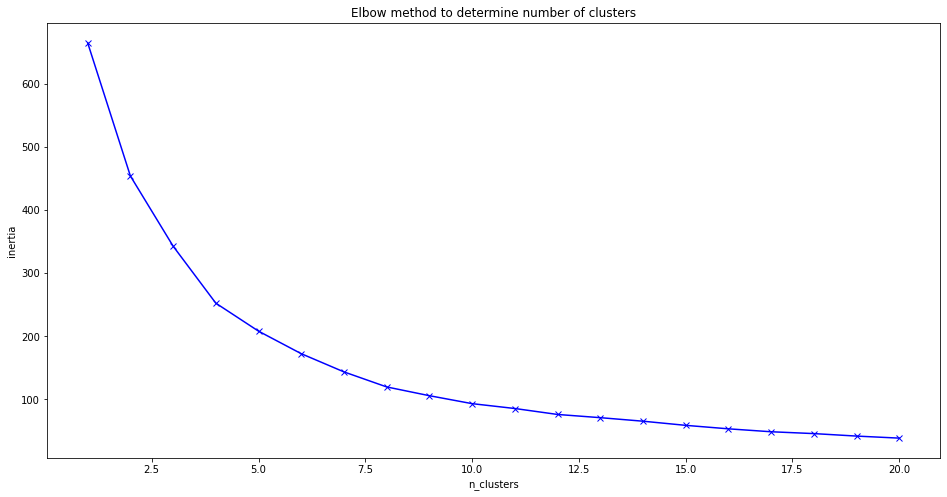

In [201]:
clusters = list(range(1,21))
total_inertia = []

for n_clusters in clusters:
    
    model = KMeans(n_clusters = n_clusters)
    model.fit(pca_factors)
    
    inertia_model = model.inertia_
    total_inertia.append(inertia_model)
    
    print(f"Total inertia{n_clusters}: {inertia_model}")
    
    
plt.figure(figsize=(16,8))
plt.plot(clusters, total_inertia, 'bx-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.title('Elbow method to determine number of clusters')
plt.show()

In [202]:
model = KMeans(n_clusters = 4)
model.fit(pca_factors)
clusters = model.predict(pca_factors)

df_customers["clusters_pca"] = clusters

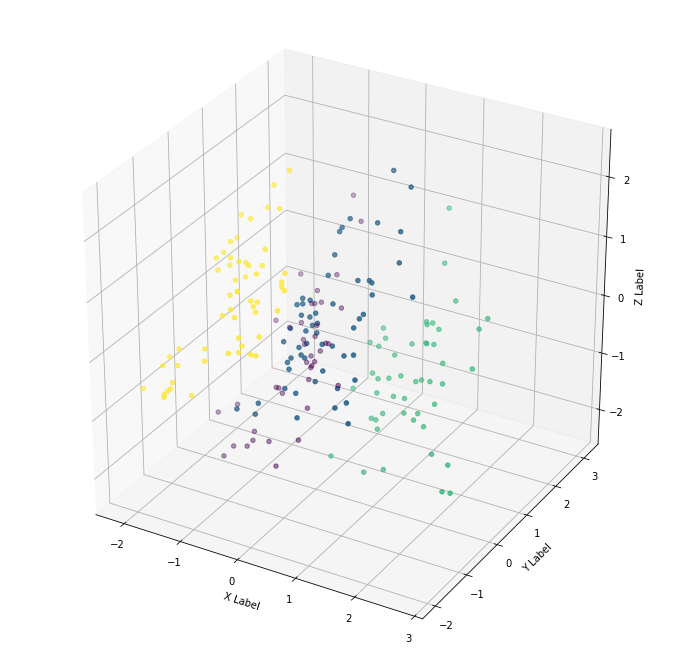

In [203]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_factors[:,0], pca_factors[:,1], pca_factors[:,2], c = clusters)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Descriptivos de clusters

In [204]:
df_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters_pca
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,3
4,1,31,17,40,1


In [205]:
df_customers.groupby("clusters_pca").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters_pca,,,,
0,0.0,28.250000,62.000000,71.675000
1,1.0,47.803571,58.071429,34.875000
2,0.0,49.437500,62.416667,29.208333
3,1.0,28.392857,60.428571,68.178571


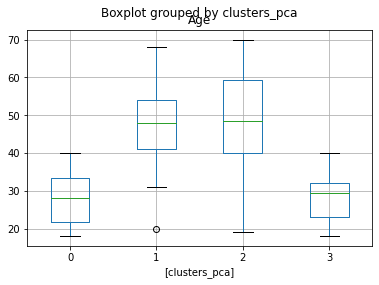

In [206]:
df_customers[["Age", "clusters_pca"]].boxplot(by = "clusters_pca")

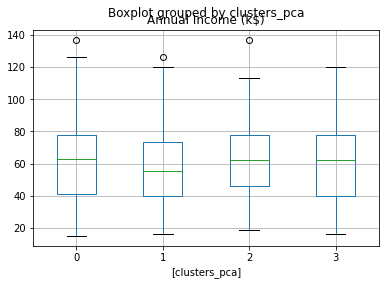

In [208]:
df_customers[["Annual Income (k$)", "clusters_pca"]].boxplot(by = "clusters_pca")

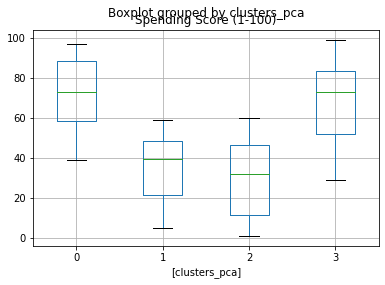

In [209]:
df_customers[["Spending Score (1-100)", "clusters_pca"]].boxplot(by = "clusters_pca")

# Otros algoritmos

In [210]:
from sklearn.cluster import AgglomerativeClustering

In [211]:
pca = PCA(n_components = 2)
pca.fit(df_scaled)
pca_factors = pca.transform(df_scaled)

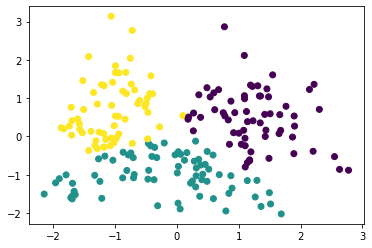

In [212]:
model = KMeans(n_clusters = 3)
model.fit(pca_factors)
clusters = model.predict(pca_factors)

plt.scatter(pca_factors[:,0], pca_factors[:,1], c = clusters)

In [213]:
model = AgglomerativeClustering(n_clusters = 3)
model.fit(df_scaled)
clusters = model.labels_

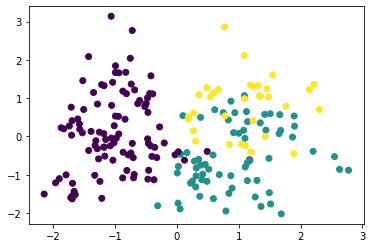

In [214]:
plt.scatter(pca_factors[:,0], pca_factors[:,1], c = clusters)